# Image processing: Bacteria growth

The goal is to calculate the doubling time of the E. Coli bacteria. The doubling time is the time it takes for a bacteria culture to double its size.

The early growth phase of a bacterial culture can be stated mathematically as:

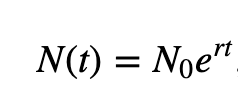

where  N(t)  is the number of cells at time  t ,  N0  is the initial number of cells and  r  is the growth rate in dimensions of time.

We will use a a series of images E. coli cells growing on a hard agar subtstrate at 100x magnification taken at 5 minutes intervals.


First we import the libraries

In [1]:
import glob # For parsing directories and files
import skimage.io # For basic image processing
import matplotlib.pyplot as plt # For plotting
import numpy as np
from scipy import ndimage

ModuleNotFoundError: No module named 'skimage'

The uncompressed file contains images coming from 2 different capturing techniques, capturing the fluorescence of different proteins.

We will use the TRITC files.

First we will load the TRITC files using glob into a variable called files:

In [3]:
### TO BE DONE BY STUDENT###
# 1 line of code
# 2 points



In [4]:
len(files)

30

In [5]:
files

['2016-04-03-muir_dryrun/img_000000004_TRITC_000.tif',
 '2016-04-03-muir_dryrun/img_000000013_TRITC_000.tif',
 '2016-04-03-muir_dryrun/img_000000017_TRITC_000.tif',
 '2016-04-03-muir_dryrun/img_000000000_TRITC_000.tif',
 '2016-04-03-muir_dryrun/img_000000010_TRITC_000.tif',
 '2016-04-03-muir_dryrun/img_000000007_TRITC_000.tif',
 '2016-04-03-muir_dryrun/img_000000029_TRITC_000.tif',
 '2016-04-03-muir_dryrun/img_000000003_TRITC_000.tif',
 '2016-04-03-muir_dryrun/img_000000014_TRITC_000.tif',
 '2016-04-03-muir_dryrun/img_000000009_TRITC_000.tif',
 '2016-04-03-muir_dryrun/img_000000027_TRITC_000.tif',
 '2016-04-03-muir_dryrun/img_000000023_TRITC_000.tif',
 '2016-04-03-muir_dryrun/img_000000024_TRITC_000.tif',
 '2016-04-03-muir_dryrun/img_000000019_TRITC_000.tif',
 '2016-04-03-muir_dryrun/img_000000020_TRITC_000.tif',
 '2016-04-03-muir_dryrun/img_000000021_TRITC_000.tif',
 '2016-04-03-muir_dryrun/img_000000018_TRITC_000.tif',
 '2016-04-03-muir_dryrun/img_000000025_TRITC_000.tif',
 '2016-04-




Files are not sorted, so let's do it:

In [6]:
### TO BE DONE BY STUDENT###
# 1 line of code
# 2 points




In [7]:
files

['2016-04-03-muir_dryrun/img_000000000_TRITC_000.tif',
 '2016-04-03-muir_dryrun/img_000000001_TRITC_000.tif',
 '2016-04-03-muir_dryrun/img_000000002_TRITC_000.tif',
 '2016-04-03-muir_dryrun/img_000000003_TRITC_000.tif',
 '2016-04-03-muir_dryrun/img_000000004_TRITC_000.tif',
 '2016-04-03-muir_dryrun/img_000000005_TRITC_000.tif',
 '2016-04-03-muir_dryrun/img_000000006_TRITC_000.tif',
 '2016-04-03-muir_dryrun/img_000000007_TRITC_000.tif',
 '2016-04-03-muir_dryrun/img_000000008_TRITC_000.tif',
 '2016-04-03-muir_dryrun/img_000000009_TRITC_000.tif',
 '2016-04-03-muir_dryrun/img_000000010_TRITC_000.tif',
 '2016-04-03-muir_dryrun/img_000000011_TRITC_000.tif',
 '2016-04-03-muir_dryrun/img_000000012_TRITC_000.tif',
 '2016-04-03-muir_dryrun/img_000000013_TRITC_000.tif',
 '2016-04-03-muir_dryrun/img_000000014_TRITC_000.tif',
 '2016-04-03-muir_dryrun/img_000000015_TRITC_000.tif',
 '2016-04-03-muir_dryrun/img_000000016_TRITC_000.tif',
 '2016-04-03-muir_dryrun/img_000000017_TRITC_000.tif',
 '2016-04-

We have 30 images, let's see them all in a 6x5 grid of 30x24 size

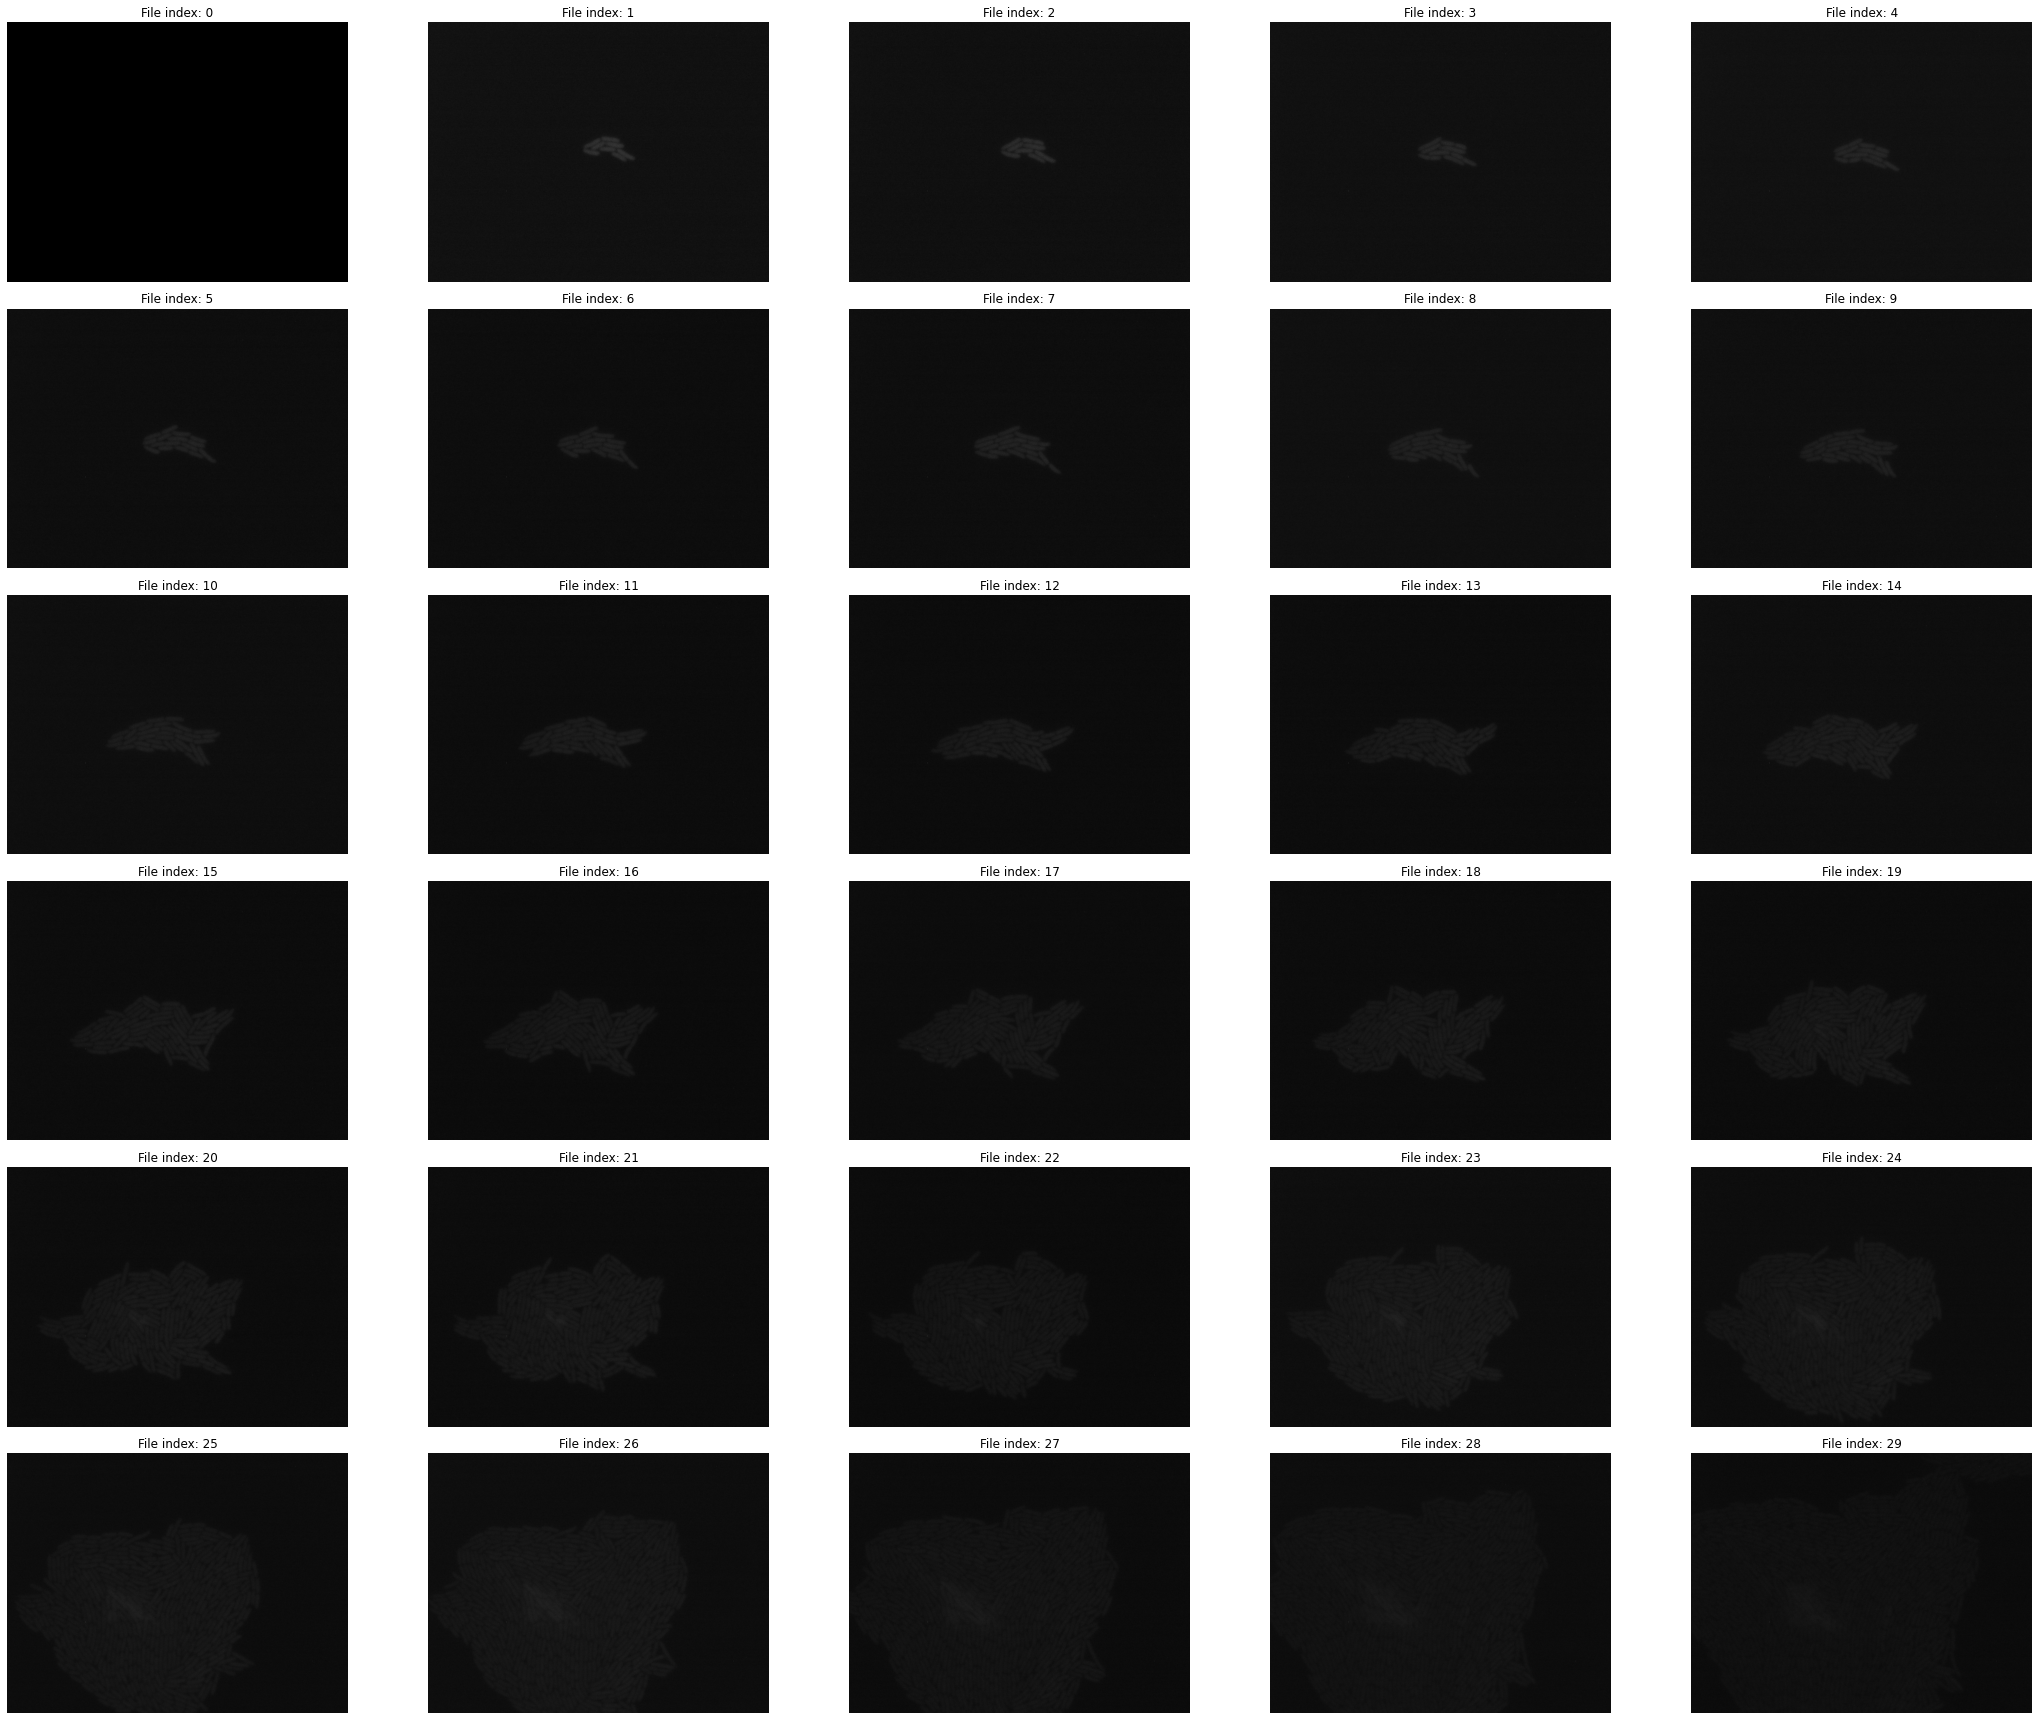

In [8]:
### TO BE DONE BY STUDENT###
# 16 points














The result is not too good... we can only see a faint shadow in some of the images.

Let's have a closer look at image with index 15:

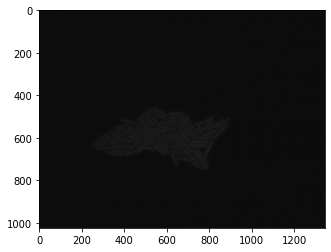

In [9]:
im = skimage.io.imread(files[15])
plt.imshow(im, cmap='gray')

Let's zoom to see only the center of the image, rows 550 to 650 and columns 400 to 500

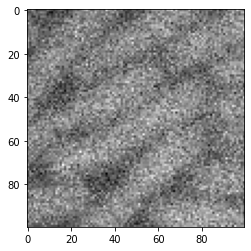

In [10]:
### TO BE DONE BY STUDENT###
# 2 points




And the top left 100x100 pixels

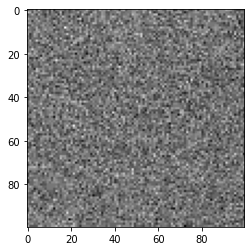

In [11]:
### TO BE DONE BY STUDENT###
# 2 points





## QUESTION: What do you think is the problem with this image?
Explain in the next cell

\### TO BE DONE BY STUDENT###

\# 2 points

**Answer:**



## Let's try to improve the quality of the image
Let's apply the following 4x4 filter:

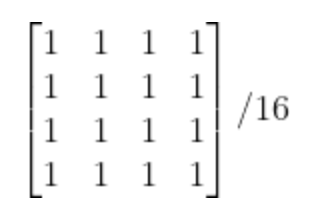

## QUESTION: What is this kind of filter name and what will we achieve applying it? 

\### TO BE DONE BY STUDENT###

\# 2 points

**Answer:** 



------------------------------------

Let's apply the filter specified above using ndimage.convolve

In [12]:
### TO BE DONE BY STUDENT###
# 10 points











Let's see how the image looks like now

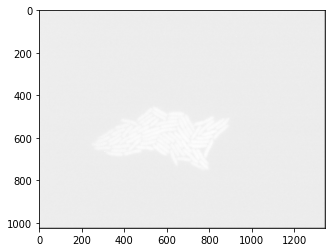

In [13]:
plt.imshow(filtered, cmap='gray')

And repeat the zooms

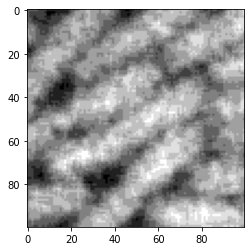

In [14]:
### TO BE DONE BY STUDENT###
# 1 points



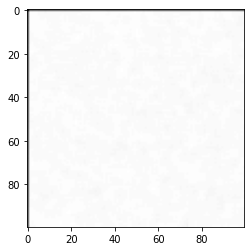

In [15]:
### TO BE DONE BY STUDENT###
# 1 points



To fullly separate the pixels from the bacteria from the background let's convert the image into a binary image and for that we need to find the thershold.

To do that let's plot the histogram of the image so we can identify hot to isolate the pixels with relevant informations (use skimage.exposure.histogram).

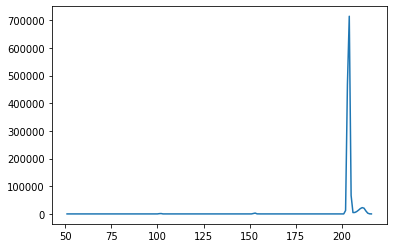

In [18]:
### TO BE DONE BY STUDENT###
# 5 points
from skimage.exposure import histogram




There is a very tall peak that makes it difficult to read the lower values of the chart. To improve the chart understanding let's display it in logarithmic scale

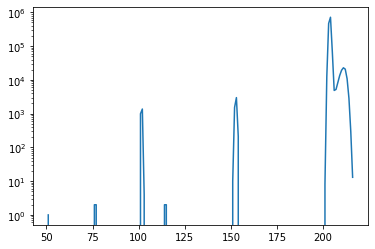

In [19]:
### TO BE DONE BY STUDENT###
# 5 points




It Looks like all information is in the last bins of the histogram. Let's visualize only the last 20 bins

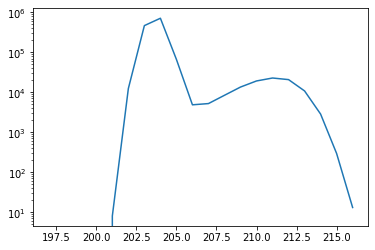

In [20]:
### TO BE DONE BY STUDENT###
# 5 points






In this histogram we can see 2 peaks, one of them corresponds to the background noise (the higher peak) and the other are the pixels corresponding to the bacteria. We will use a threshold value of 205. Create a binary image (from the filtered image).

In [21]:
### TO BE DONE BY STUDENT###
# 5 points




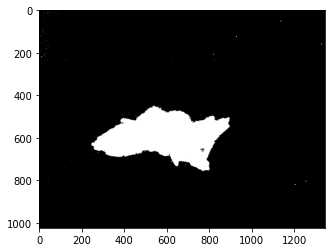

In [22]:
plt.imshow(binary_im, cmap = 'gray')

Now let's create a function that transforms the images. The function should accept an image and should perform the convolution (filter) and create the binary image from it (with the threshold we have found before). The function shoud return the binary image.

In [23]:
### TO BE DONE BY STUDENT###
# 2 points







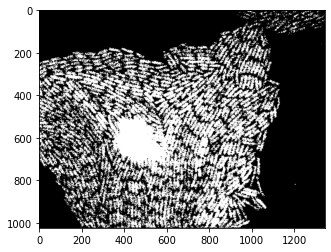

In [24]:
im = skimage.io.imread(files[29])
im_prep = img_prepare(im)

plt.imshow(im_prep, cmap = 'gray')

Using this function let's display all images with the same grid we used before

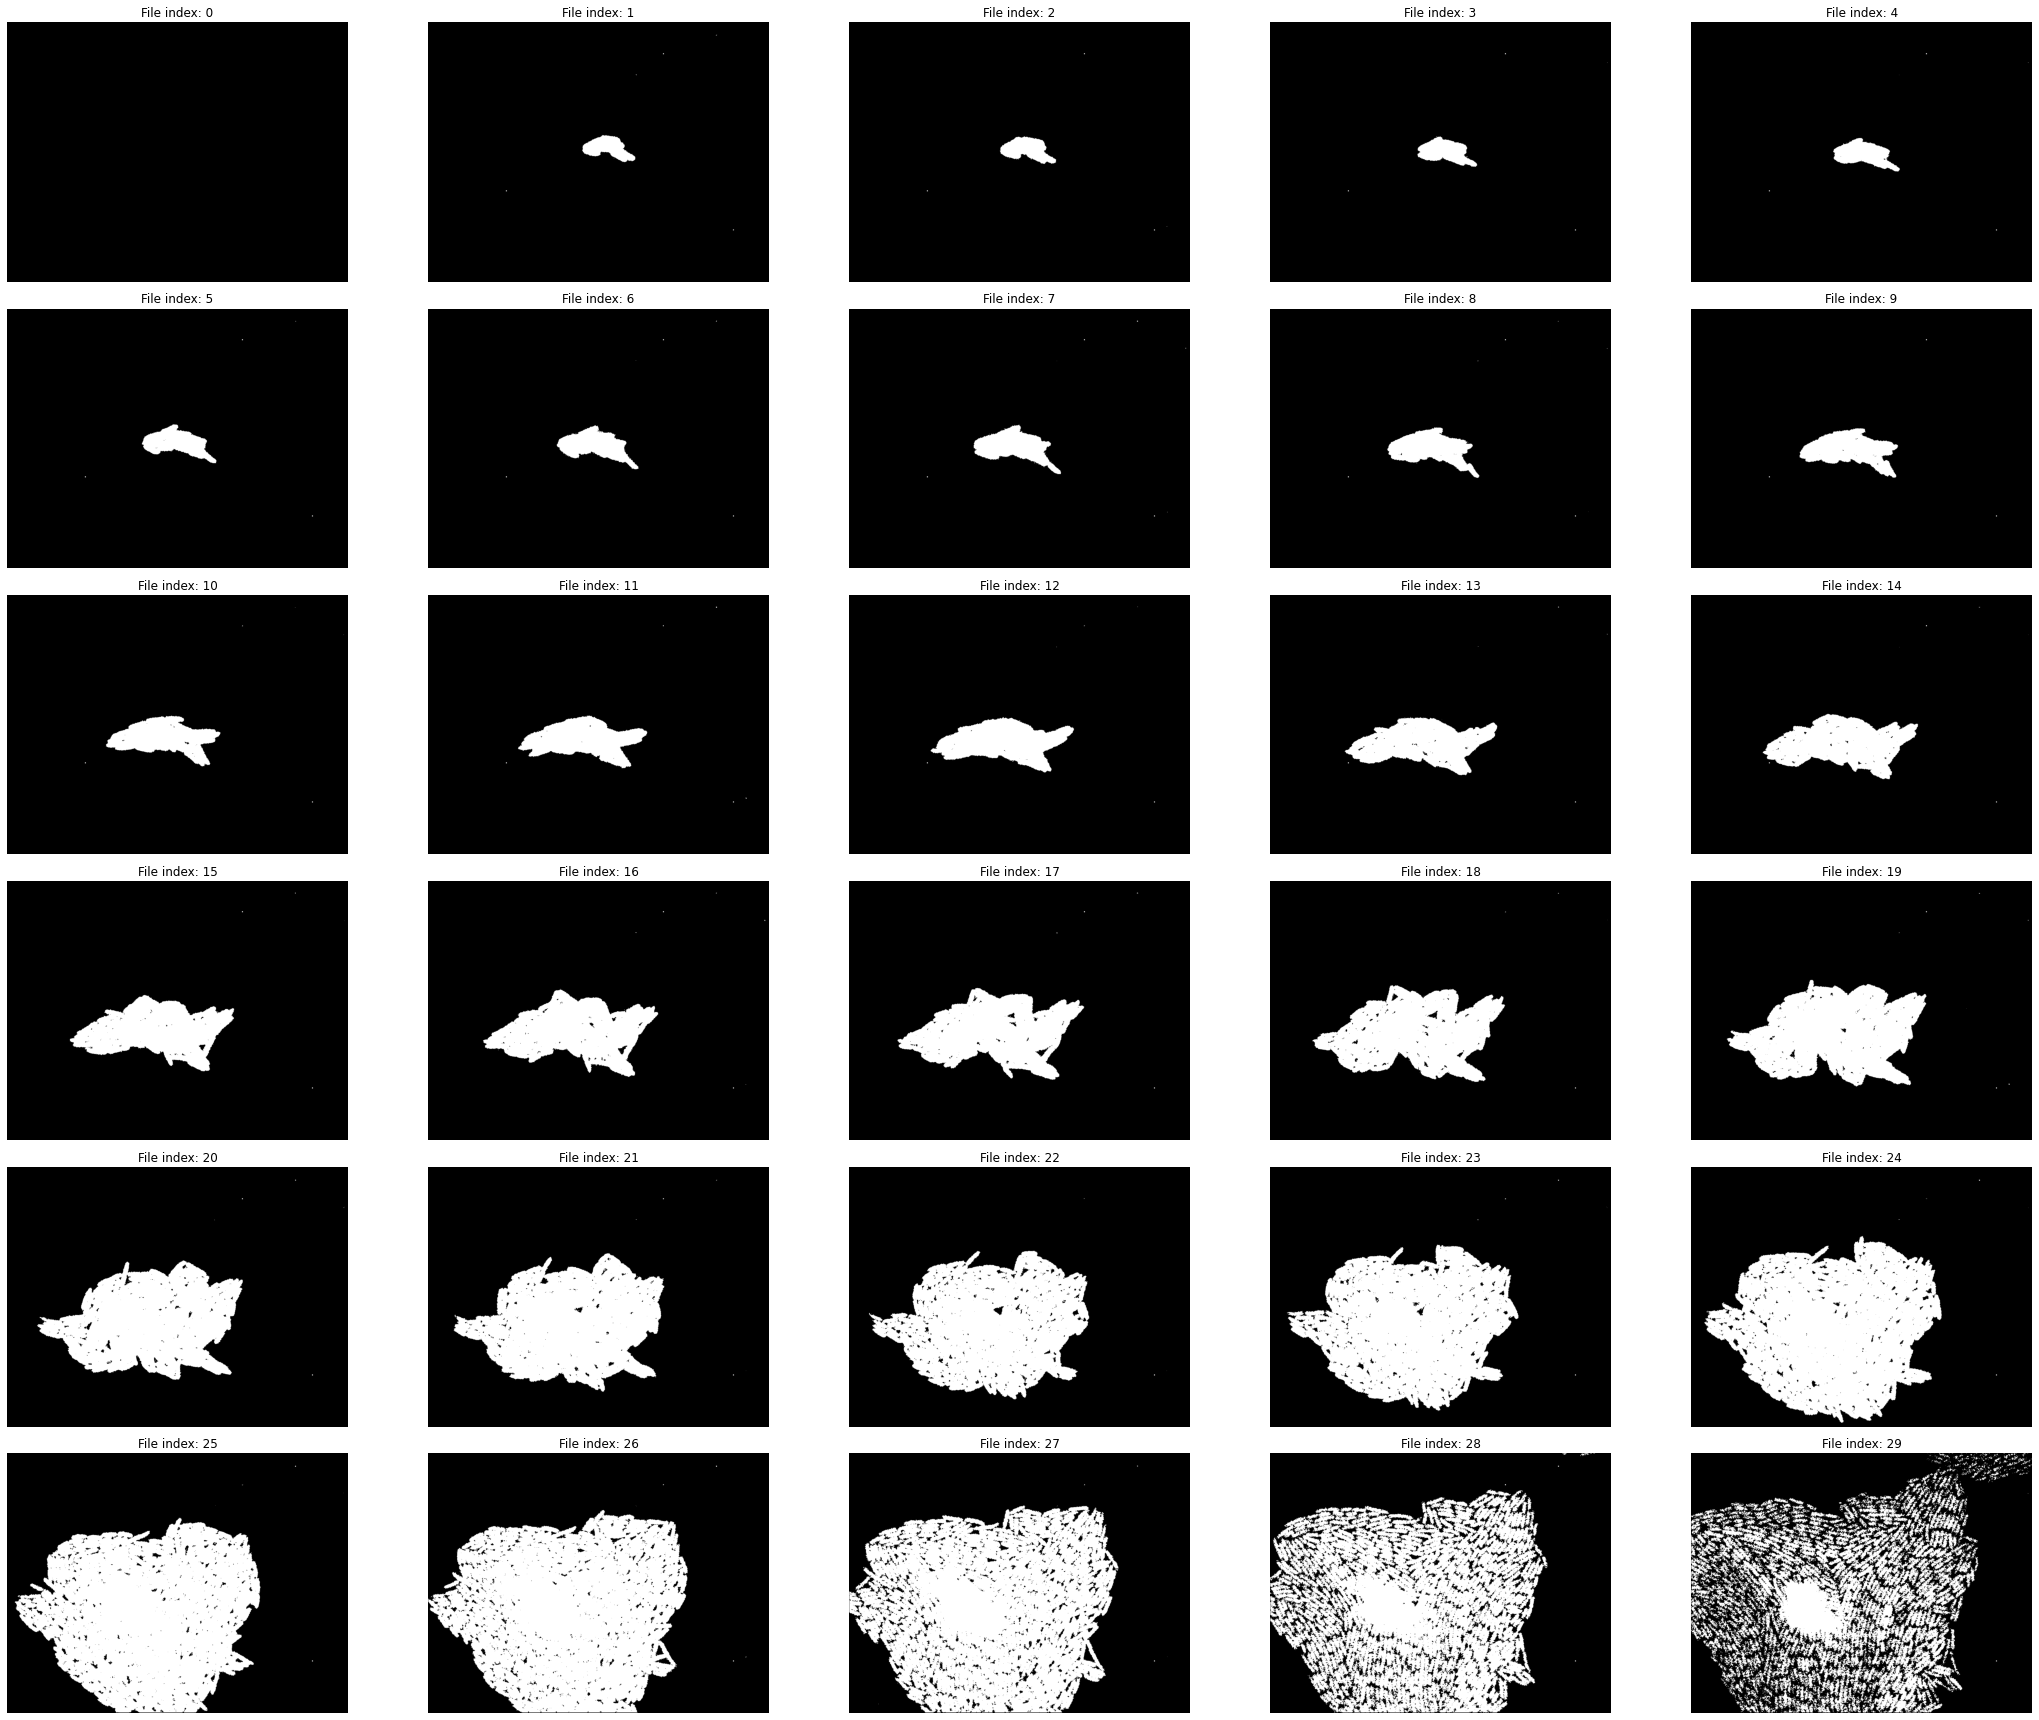

In [25]:
### TO BE DONE BY STUDENT###
# 3 points










As we said at the beginning we are interested in calculating the doubling time, what is related to the growth rate. This means we are interested in knowing the size of the population in every image. This could be achieved counting the number of bacteria. This is not possible as with the images we have we can't efectively separate them in the image. Another method (considering we can assume they are all the same size) is to calculate the surface the bacteria population occupies. We can do this by just counting the active pixels in the binary image.

Create a function that accepts a binary image and returns the area in pixels of the bacteria

In [26]:
### TO BE DONE BY STUDENT###
# 2 points





In [27]:
im = skimage.io.imread(files[10])
im_prep = img_prepare(im)
print('The area in pixels of bacteria population in image 10 is: {}'.format(bacteria_area(im_prep)))

The area in pixels of bacteria population in image 10 is: 46047


Now let's calculate the ara for all images. 

Steps:

1.- Create a numpy array of the length of the files list initialized with 0s

2.- Loop through the files and for each of them 

    - Get the binary image using the function you created earlier
    - Calculate the area
    - Store it in the correpsonding position in the np array you created

In [28]:
### TO BE DONE BY STUDENT###
# 3 points






In [29]:
print(bact_area)

[     0.  12301.  14110.  15656.  18142.  21702.  25477.  29989.  34149.
  39442.  46047.  54889.  65098.  75270.  87020. 103761. 122149. 143421.
 167412. 199610. 230966. 272729. 312182. 368549. 433751. 504929. 570307.
 615519. 608579. 462243.]


Let's display these values in a chart. In the x axis we should have time (remember these images were taken with 5 minutes difference) and the area in pixels in the ye axis

Text(0, 0.5, 'cell area [pixels]')

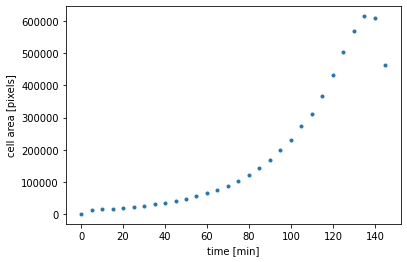

In [30]:
### TO BE DONE BY STUDENT###
# 5 points








Good!! We are observing the exponential growth we were expecting!! There seems to be an issue with the last 3 images and also the first one is not useful for our goal as it is empty. Let's discard them! 

Let's create another array excluding the last 3 images (outliers) and the first one.

In [31]:
### TO BE DONE BY STUDENT###
# 2 points




In [34]:
bact_area_wo

array([ 12301.,  14110.,  15656.,  18142.,  21702.,  25477.,  29989.,
        34149.,  39442.,  46047.,  54889.,  65098.,  75270.,  87020.,
       103761., 122149., 143421., 167412., 199610., 230966., 272729.,
       312182., 368549., 433751., 504929., 570307.])

Text(0, 0.5, 'cell area [pixels]')

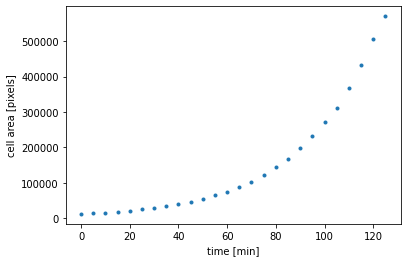

In [35]:
### TO BE DONE BY STUDENT###
# 3 points







Now that we have the empirical growth every five minutes we need to find the doubling time. To do this we need to do several things.

First find a value of r in the formula we saw at the beginning that adjusts this data best.

This is the formula as a reminder:

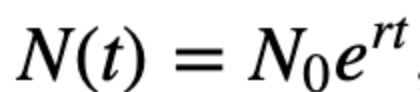

N0 is the size (in our case size in pixels) of the population at the beginning (bact_area_wo[0]).

As you can see below there is one value of r for which this formula will match our data almost perfectly and others that will have bigger errors:

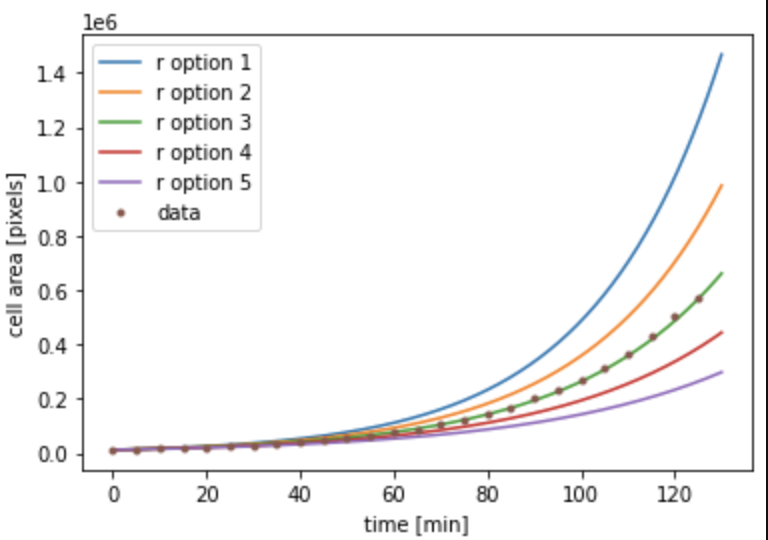

Finding this optimum r in data with an exponential behaviour is the job of a logistic regression. But this time we will do it with our own code so we understand the intuitions.

We first need a formula to calculate the error involved for a particular value of r. We will use this one:

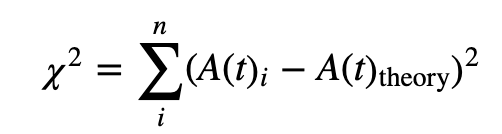

This is often called the Chi-squared statistic. n  is the number of data points and A(t)theory is the expected cellular area at time t, given by our model of exponential growth (the abouve formula) for a given value of r. A(t) is the data we have obtained from the images. We will try for 200 values of r between 0 and 0.1. For each of the values of r we will calculate the theoretical value of the area at each time an image has been taken, and apply the chi error formula. We store the chi errors for the 200 values of r and we will use the value of r with the lowest index. 

1.- Create an r_range numpy array with 200 values between 0 and 0.1 (tip: linspace)

In [36]:
### TO BE DONE BY STUDENT###
# 2 points
# Define the range of growth rates. 



In [37]:
r_range.shape

(200,)

2.- Create a numpy array initialized with 0, with the same size as the above r_range where we will store the error for each value of r. Call it chi_sq.

In [39]:
### TO BE DONE BY STUDENT###
# 2 points
# Set up an empty vector to store the chi squared value



In [40]:
chi_sq.shape

(200,)

3.- Loop through the values of r in r_range and for each value of r do_
    - Calculate the theoretical value of the area (theo) using the N(t) formula. 
    - Calculate and store the chi squared error for that value of r

In [ ]:
### TO BE DONE BY STUDENT###
# 4 points
time_range = np.arange(0, len(bact_area_wo)) * 5 
# Iterate through each possible growth rate. 
for i in range(len(r_range)):
    # Compute the theoretical value at each time point. 
    theo = bact_area_wo[0] * np.exp(r_range[i] * time_range)
    
    # Compute the sum squared residuals. 
    chi_sq[i] = ### TO BE DONE BY STUDENT###

In [42]:
chi_sq

array([1.17804512e+12, 1.17337481e+12, 1.16845996e+12, 1.16328783e+12,
       1.15784509e+12, 1.15211774e+12, 1.14609115e+12, 1.13975001e+12,
       1.13307828e+12, 1.12605925e+12, 1.11867543e+12, 1.11090862e+12,
       1.10273982e+12, 1.09414928e+12, 1.08511645e+12, 1.07562002e+12,
       1.06563789e+12, 1.05514719e+12, 1.04412428e+12, 1.03254481e+12,
       1.02038374e+12, 1.00761537e+12, 9.94213403e+11, 9.80151044e+11,
       9.65401071e+11, 9.49935955e+11, 9.33727998e+11, 9.16749497e+11,
       8.98972941e+11, 8.80371240e+11, 8.60918002e+11, 8.40587851e+11,
       8.19356799e+11, 7.97202679e+11, 7.74105653e+11, 7.50048789e+11,
       7.25018737e+11, 6.99006498e+11, 6.72008321e+11, 6.44026718e+11,
       6.15071639e+11, 5.85161808e+11, 5.54326259e+11, 5.22606084e+11,
       4.90056427e+11, 4.56748758e+11, 4.22773467e+11, 3.88242808e+11,
       3.53294251e+11, 3.18094290e+11, 2.82842772e+11, 2.47777801e+11,
       2.13181314e+11, 1.79385394e+11, 1.46779434e+11, 1.15818247e+11,
      

Let's plot now the error for each value of r

Text(0, 0.5, '$\\chi^2$')

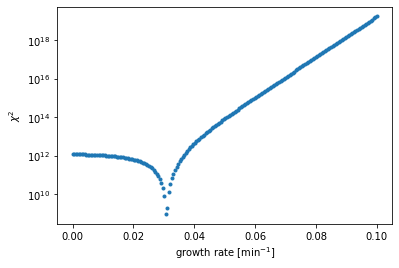

In [44]:
### TO BE DONE BY STUDENT###
# 4 points
# Plot the chisq statistic





We can easily see there is a clear minimum (a valu of r with the lowest error). Let's identify this value, finding the index with the minimum value (np.argmin) and then geting the value at this index.

In [45]:
### TO BE DONE BY STUDENT###
# 2 points
# Find the minimum of the chi_sq. 





The index at the minimum is 0.030653266331658293 min^-1.


Let's display in a chart the formula with the calculated value of r and the area obtained from the images.

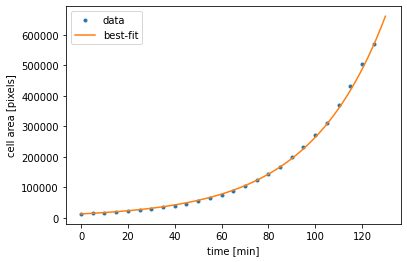

In [46]:
### TO BE DONE BY STUDENT###
# 4 points
# Compute the best fit





Good!! We have a great fit!! now we just need to find the doubling time.

We just need to apply the formula:

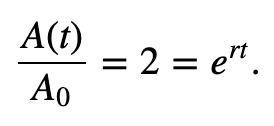

and isolate t. 

So te will be the result of this:

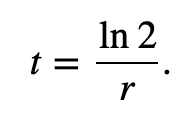

Let's calculate it. (remember that in numpy the natural logarithm is the function np.log)

In [47]:
### TO BE DONE BY STUDENT###
# 2 points




The doubling time of the E. Coli bacteria is 22.61250638220149 minutes
